In [2]:
import numpy as np
import matplotlib.pyplot as plt

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

In [3]:
def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_ed36fabaa080427f8bf394b7e5224f0d = 'https://s3.eu.cloud-object-storage.appdomain.cloud'
else:
    endpoint_ed36fabaa080427f8bf394b7e5224f0d = 'https://s3.private.eu.cloud-object-storage.appdomain.cloud'

client_ed36fabaa080427f8bf394b7e5224f0d = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='j_ia8qJ_f-6CKt6mQXa_5FOpu1DLtnr8P0WxcOtzP7IH',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_ed36fabaa080427f8bf394b7e5224f0d)

body = client_ed36fabaa080427f8bf394b7e5224f0d.get_object(Bucket='specwater-donotdelete-pr-s2nov85kwrxpuj',Key='df_small.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

In [4]:
df_data_1 = pd.read_csv(body, index_col=0).transpose()
df_data_1.head()

0,agua,agua com sal,agua com muito sal,alvejante,desengordurante_cif_matheus,agua de torneira,fanta laranja,coca,Cópia de fanta laranja,fanta laranja gelada,...,alcool 70 com agua,clight_abacaxi,tang_caju,clight_laranja_normal,desinfetante,finasterida,finasterida2,agua desmineralizada,agua desmineralizada carvao ativado,agua torneira
1,994,994,994,995,995,976,992,692,993,968,...,996,313,549,281,409,209,61,997,394,995
2,993,994,994,995,995,975,992,692,992,984,...,995,313,549,281,409,208,62,998,395,995
3,994,995,993,994,995,975,993,775,993,985,...,995,314,550,282,409,208,61,997,395,995
4,994,994,994,995,1002,975,992,712,993,986,...,995,314,550,286,409,208,61,998,395,995
5,1002,994,994,994,1000,974,992,692,998,985,...,996,313,-1,283,650,208,62,997,395,1002


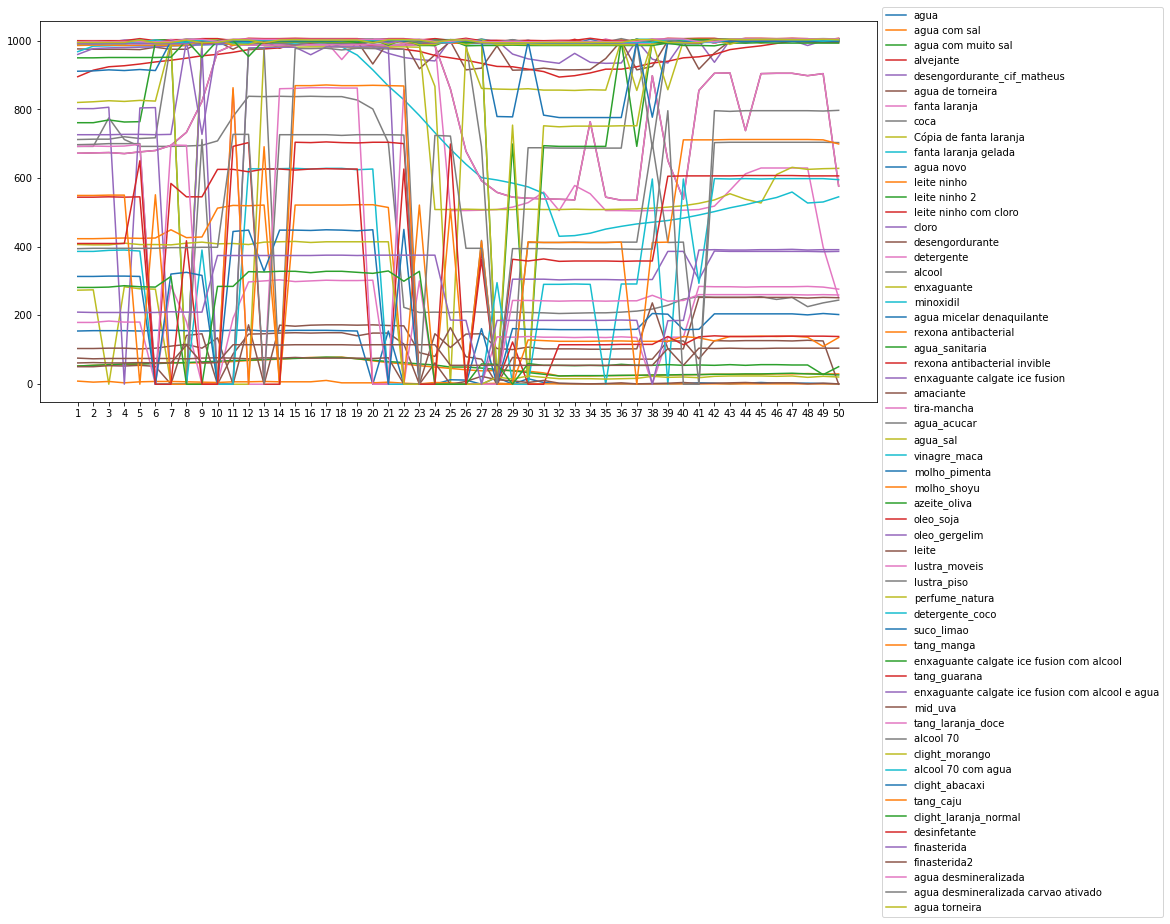

In [14]:
plt.figure(figsize=(15,7))
plt.plot(df_data_1)
plt.legend(df_data_1.columns, loc='best', bbox_to_anchor=(1.0, 1.05))
plt.show();#2

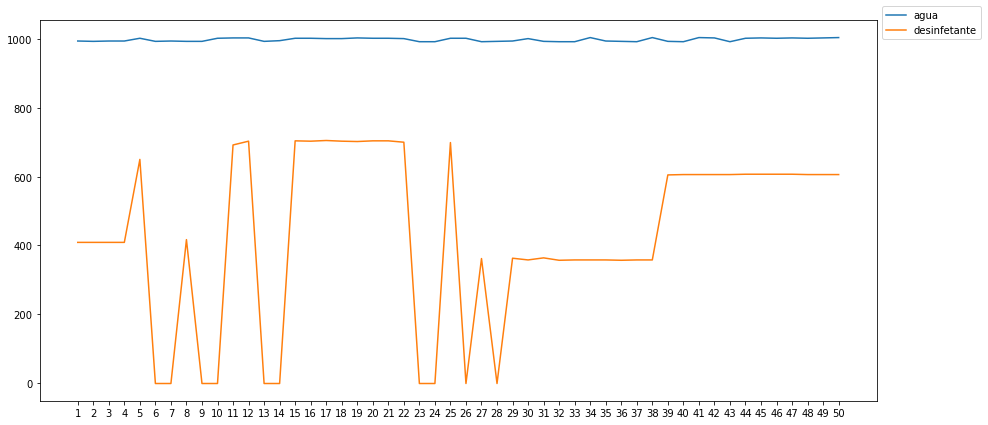

In [15]:
items=['agua','desinfetante']
teste = df_data_1.filter(items)
plt.figure(figsize=(15,7))
plt.plot(teste)
plt.legend(teste.columns, loc='best', bbox_to_anchor=(1.0, 1.05))
plt.show();

In [5]:

body = client_ed36fabaa080427f8bf394b7e5224f0d.get_object(Bucket='specwater-donotdelete-pr-s2nov85kwrxpuj',Key='amostra_agua_oficial5.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_2 = pd.read_csv(body)
df_data_2.head()


,Target,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,...,Column292,Column293,Column294,Column295,Column296,Column297,Column298,Column299,Column300,Column301
0,1,994,995,994,995,994,993,993,994,994,...,995,996,994,995,994,994,995,994,994,1004
1,1,994,995,994,995,994,995,1000,994,994,...,994,1002,994,994,1004,994,994,1004,993,994
2,1,994,996,994,995,996,1002,994,996,995,...,1003,994,994,1003,994,995,994,994,994,994
3,0,995,995,996,995,995,995,995,995,995,...,1005,995,995,1004,995,995,1005,995,995,994
4,0,994,995,994,994,995,994,994,995,995,...,995,1002,994,995,1002,995,994,1001,994,994


In [8]:
### Train and test data split

from sklearn.model_selection import train_test_split

seed = 33

df_data_2.drop_duplicates(inplace=True)
X = df_data_2.drop(['Target'], axis=1).values
y = df_data_2[['Target']].values

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.15, stratify=y, random_state=seed)

In [15]:
### Train model Decision Tree

from sklearn.tree import DecisionTreeClassifier

model_dtc = DecisionTreeClassifier(
    class_weight="balanced",
    max_depth=12,
    max_features=0.9492490250885458,
    random_state=33,
)

model_dtc.fit(train_X,train_y)
model_dtc.score(test_X, test_y)

0.7647058823529411

In [19]:
### Train model Gradient Boosting Classifier

from sklearn.ensemble import GradientBoostingClassifier

modelo_gbc = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0, max_depth=1, random_state=33);
modelo_gbc.fit(train_X, np.ravel(train_y,order='C'))
modelo_gbc.score(test_X, test_y)

0.8235294117647058

In [20]:
### Train model SGD Classifier

from sklearn.linear_model import SGDClassifier

model_sgd = SGDClassifier( class_weight="balanced", random_state=33)

model_sgd.fit(train_X, np.ravel(train_y,order='C'))
model_sgd.score(test_X, test_y)

0.5294117647058824

In [25]:
### Train model XGB Classifier

from xgboost import XGBClassifier

model_xgb = XGBClassifier(eval_metric='logloss')

model_xgb.fit(train_X, train_y)
model_xgb.score(test_X, test_y)

0.8235294117647058